In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]
import seaborn as sns; sns.set(style="white", color_codes=True)
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from fpm_analysis.phase_result import FPMResult

data = '/home/alejandro/git/fpm_analysis/hdf5_data/rock1'

result = FPMResult()
result.load_hdf5(data)


/home/alejandro/anaconda3/envs/py37/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
INFO:fpm_analysis.phase_result:Files founded /home/alejandro/git/fpm_analysis/hdf5_data/rock1/image_1357_r.h5py
/home/alejandro/git/fpm_analysis/hdf5_data/rock1/image_1521_g.h5py
/home/alejandro/git/fpm_analysis/hdf5_data/rock1/image_1539_b.h5py
INFO:fpm_analysis.phase_result:Open file /home/alejandro/git/fpm_analysis/hdf5_data/rock1/image_1357_r.h5py for color "r"
INFO:fpm_analysis.phase_result:Sample added
INFO:fpm_analysis.phase_result:Open file /home/alejandro/git/fpm_analysis/hdf5_data/rock1/image_1521_g.h5py for color "g"
INFO:fpm_analysis.phase_result:Sample added
INFO:fpm_analysis.phase_result:Open file /home/alejandro/git/fpm_analysis/hdf5_data/rock1/image_1539_b.h5py for color "b"
INFO:fpm_analysis.p

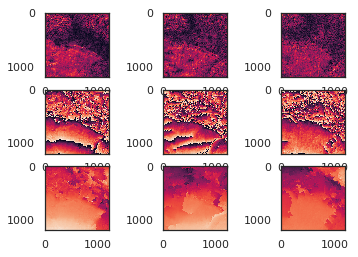

In [2]:
fig, ax = plt.subplots(3,3)
result.plot_amplitude(color='r', ax=ax[0][0])
result.plot_amplitude(color='g', ax=ax[0][1])
result.plot_amplitude(color='b', ax=ax[0][2])
result.plot_phase(color='r', ax=ax[1][0])
result.plot_phase(color='g', ax=ax[1][1])
result.plot_phase(color='b', ax=ax[1][2])
result.plot_unwrapped(color='r', ax=ax[2][0])
result.plot_unwrapped(color='g', ax=ax[2][1])
result.plot_unwrapped(color='b', ax=ax[2][2])

In [3]:
@interact(x=['r/g', 'r/b', 'g/r', 'g/b', 'b/r', 'b/g'],
          y=['r/g', 'r/b', 'g/r', 'g/b', 'b/r', 'b/g'],
          r_shift=(0, 10.0, 1),
          g_shift=(0, 10.0, 1),
          b_shift=(0, 10.0, 1))
def plot_quotients_2d(x='r/g', y='b/g', r_shift=0.0, g_shift=0.0, b_shift=0.0):
    # result.set_phase_shift(r=r_shift, g=g_shift, b=b_shift)
    g = sns.jointplot(x=result.get_quotient(x), y=result.get_quotient(y), xlim=(-30, 30), ylim=(-10, 10))

interactive(children=(Dropdown(description='x', options=('r/g', 'r/b', 'g/r', 'g/b', 'b/r', 'b/g'), value='r/g…